In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

data = np.load('MCchain_IC_alpha_0.30_beta_1.40_rstar_38.00_iter_1000000.npz')

alphas = data['alpha_arr']
betas = data['beta_arr']
rstars = data['r_star_arr']

burn = 1500
alphas = alphas[burn:]
betas = betas[burn:]
rstars = rstars[burn:]

print(len(alphas))

248341


In [2]:
#Auto-correlation

def rho(lag, param): #autocorrelation function
    N = len(param)
    mean = np.mean(param)
    numerator = np.sum((param[:(N-lag)] - mean) * (param[lag:] - mean))
    denominator = np.sum((param - mean)**2)
    return numerator / denominator

'''Autocorrelation(lag)'''
lag_limit = 3000
autocoral = np.empty(lag_limit) #for alphas
autocorbt = np.empty(lag_limit) #for betas
autocorrs = np.empty(lag_limit) #for rstars
for i in range(lag_limit):
    autocoral[i] = rho(i, alphas)
    autocorbt[i] = rho(i, betas)
    autocorrs[i] = rho(i, rstars)

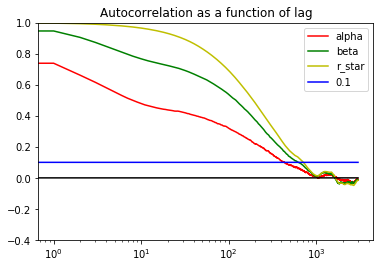

In [3]:
#PLOT

yzeros = np.zeros(lag_limit)
ypoint1s = 0.1 * np.ones(lag_limit)

plt.plot(autocoral, 'r', label = 'alpha')
plt.plot(autocorbt, 'g', label = 'beta')
plt.plot(autocorrs, 'y', label = 'r_star')
plt.plot(yzeros, 'black')
plt.plot(ypoint1s, 'b', label = '0.1')
plt.xscale('log')
plt.ylim(-0.4, 1)
plt.legend()
plt.title('Autocorrelation as a function of lag')
plt.show()

In [4]:
#Find lag at which autocorrelation becomes < 0.1

def lagfinder(autocorparam, limit):
    for i in range(limit):
        if autocorparam[i] <= 0.1:
            l0 = i
            break
    return l0

alpha_l0 = lagfinder(autocoral, lag_limit-1)
beta_l0 = lagfinder(autocorbt, lag_limit-1)
rstar_l0 = lagfinder(autocorrs, lag_limit-1)
print(alpha_l0, beta_l0, rstar_l0)

434 623 712


In [6]:
#Get every l0-th element of all parameter arrays

l0 = 750
print(autocoral[l0], autocorbt[l0], autocorrs[l0])

#size of new parameter arrays to be formed by taking every l0 sample from all samples
n_sz = int(len(alphas)/l0)

n_als, n_bts, n_rss = alphas[::l0], betas[::l0], rstars[::l0]
print(len(n_als), len(n_bts), len(n_rss))

0.03671895495857964 0.06506913390019012 0.0845974377067495
332 332 332


In [8]:
#Covariance Matrix and Cholesky Decomposition

'''def cov(p1, p2):
    N = len(p1)
    numerator = np.sum((p1 - np.mean(p1)) * (p2 - np.mean(p2)))
    return numerator/(N-1)'''

cov_mat = np.cov(np.array([n_als, n_bts, n_rss]))
#cov_mat = covariance([[al-al, al-bt, al-rs],
#                      [bt-al, bt-bt, bt-rs],
#                      [rs-al, rs-bt, rs-rs]])

L = np.linalg.cholesky(cov_mat)
print(L)

[[0.03070312 0.         0.        ]
 [0.05597883 0.11855854 0.        ]
 [4.40037282 3.90693687 1.41174337]]


In [10]:
#Save Cholesky-decomposed matrix L

np.save('Cholesky_decomp_L.npy', L)
print('Okay! Saved!')

Okay! Saved!
